In [132]:
# Importamos las librerias necesarias para el proyecto
import pandas as pd
from bs4 import BeautifulSoup
import requests
import numpy as np
import Levenshtein as lv
import matplotlib.pyplot as plt
from datetime import datetime
import re

%matplotlib inline

In [2]:
# Con la libreria beautifulsoup, obtenemos el html de la pagina
r = requests.get('https://clasificados.eldeber.com.bo/contrata2')
html = r.text
soup = BeautifulSoup(html, 'html.parser')
print(soup)

<!DOCTYPE html>

<html dir="ltr" lang="es">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="https://clasificados.eldeber.com.bo/sites/all/themes/flatclassifieds/favicon.ico" rel="shortcut icon" type="image/vnd.microsoft.icon"/>
<meta content="El portal de anuncios clasificados en línea del periódico El Deber (Santa Cruz - Bolivia). La sección de compra - venta de Autos, Motos, Camiones y vehículos usados en Santa Cruz, clasificados por tipo de vehículos y por marcas" name="description"/>
<meta content="autos Bolivia, Autos, Auto, autos usados, autos usados Santa Cruz, camionetas Santa Cruz, vagonetas Santa Cruz, vehículos Bolivia, autos compra venta Santa Cruz, Motos, motos Bolivia, compra, venta, Directorio, clasificados, Bolivia, Santa Cruz" name="keywords"/>
<meta content="clasificados, el deber, autos usados, autos usados Santa Cruz, camionetas Santa Cruz, vagonetas Santa Cruz, vehículos Bolivia, autos compra venta Santa Cruz, Motos, motos Bo

In [180]:
# Cargamos el csv con los datos de la pagina
df = pd.read_csv("C:/Users/TELMA/Desktop/trabajos/contrata2 clasificados el deber/1_11_confiltros.csv", sep=";", encoding="latin-1")
df

,FECHA,ADMINISTRACION / OFICINA,AGRO / GANADERÍA,ALBANIL/PINTOR,CHOFERES,COMERCIAL / VENTAS,EDUCACION,ING. CIVIL / ARQUITECTURA,INGENIERÍA,MECANICOS/REPARACIONES,PLOMERO/ELECTRICISTA/CARPINTERO,RESTAURANTES / BAR / HOTEL,SALUD,TECNICOS,TRABAJADOR DEL HOGAR,VARIOS,TOTAL
0,27/10/2021,29,26,6,15,42,1,1,1,8,1,17,13,4,12,29,205
1,28/10/2021,24,21,7,12,25,0,1,1,7,1,10,10,4,9,26,158
2,29/10/2021,35,23,5,13,44,0,1,2,3,0,15,7,7,11,33,199
3,30/10/2021,33,19,5,18,40,0,1,3,5,0,15,10,4,9,34,196
4,31/10/2021,38,17,7,28,58,1,3,11,4,1,20,15,6,9,49,267
5,1/11/2021,43,11,3,22,35,2,3,4,4,0,14,9,3,4,37,194


In [182]:
# Eliminamos los datos que no nos interesan y creamos un diccionario con los datos del dia de hoy
dictt = {}
dictt['FECHA'] = datetime.today().strftime('%d/%m/%Y')
total = 0

for link in soup.find_all('li'):
    if (link.get('class') == ['leaf']) or (link.get('class') == ['leaf first']) or (link.get('class') == ['leaf last']):
        #find the first position of '(' in link.text
        posi = link.text.find('(')
        posf = link.text.find(')')
        if link.text[posi+1] >= '0' and link.text[posi+1] <= '9':
            print(link.text[0:posi])
            columnas = [lv.distance(link.text[0:posi], i) for i in df_marks[df_marks.columns]]
            #print(columnas)
            indice = columnas.index(min(columnas))
            #print(indice)
            #print(df.columns[indice])
            dictt[df.columns[indice]] = int(link.text[posi+1:posf])
            print(link.text[posi+1:posf])
            total = total + int(link.text[posi+1:posf])
        #print(link.text[posi+1:posf])

dictt['TOTAL'] = total
dictt

VARIOS 
37
COMERCIAL / VENTAS 
35
CHOFERES 
22
RESTAURANTES / BAR / HOTEL 
14
AGRO / GANADERÍA 
11
SALUD 
9
INGENIERÍA 
4
MECANICOS/REPARACIONES 
4
TRABAJADOR DEL HOGAR 
4
ALBANIL/PINTOR 
3
ING. CIVIL / ARQUITECTURA 
3
TECNICOS 
3


{'FECHA': '02/11/2021',
 'VARIOS': 37,
 'COMERCIAL / VENTAS': 35,
 'CHOFERES': 22,
 'RESTAURANTES / BAR / HOTEL': 14,
 'AGRO / GANADERÍA': 11,
 'SALUD': 9,
 'INGENIERÍA': 4,
 'MECANICOS/REPARACIONES': 4,
 'TRABAJADOR DEL HOGAR': 4,
 'ALBANIL/PINTOR': 3,
 'ING. CIVIL / ARQUITECTURA': 3,
 'TECNICOS': 3,
 'TOTAL': 149}

In [183]:
# Actualizamos nuestro dataset
df_actlz = df.append(dictt, ignore_index=True)
df_actlz = df_actlz.fillna(0)
df_actlz

,FECHA,ADMINISTRACION / OFICINA,AGRO / GANADERÍA,ALBANIL/PINTOR,CHOFERES,COMERCIAL / VENTAS,EDUCACION,ING. CIVIL / ARQUITECTURA,INGENIERÍA,MECANICOS/REPARACIONES,PLOMERO/ELECTRICISTA/CARPINTERO,RESTAURANTES / BAR / HOTEL,SALUD,TECNICOS,TRABAJADOR DEL HOGAR,VARIOS,TOTAL
0,27/10/2021,29.0,26,6,15,42,1.0,1,1,8,1.0,17,13,4,12,29,205
1,28/10/2021,24.0,21,7,12,25,0.0,1,1,7,1.0,10,10,4,9,26,158
2,29/10/2021,35.0,23,5,13,44,0.0,1,2,3,0.0,15,7,7,11,33,199
3,30/10/2021,33.0,19,5,18,40,0.0,1,3,5,0.0,15,10,4,9,34,196
4,31/10/2021,38.0,17,7,28,58,1.0,3,11,4,1.0,20,15,6,9,49,267
5,1/11/2021,43.0,11,3,22,35,2.0,3,4,4,0.0,14,9,3,4,37,194
6,02/11/2021,0.0,11,3,22,35,0.0,3,4,4,0.0,14,9,3,4,37,149


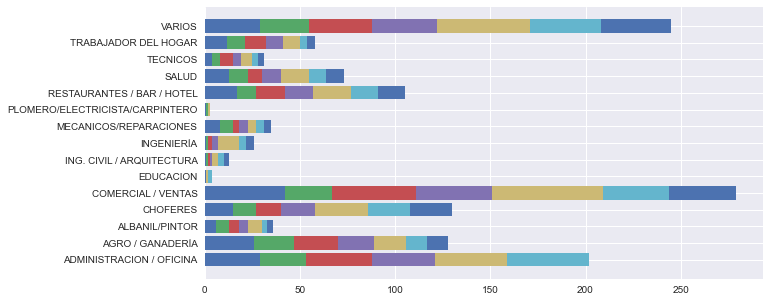

In [198]:
# Graficamos el resultado con barras horizontales acumulativas
plt.figure(figsize=(10,5))

x = df_actlz.columns[1:-1]
y = []

plt.style.use("seaborn")
for i in range(len(df_actlz['FECHA'])):
    y.append(list(df_actlz.iloc[i])[1:-1])
    if i == 0:
        plt.barh(x, y[i])
        #plt.barh(x, y[i], label='{}'.format(i))
        cont = np.array(y[i])
    else:
        plt.barh(x, y[i], left=cont)
        #plt.barh(x, y[i], left=cont, label='{}'.format(i))
        cont = cont + np.array(y[i])

#plt.legend(loc='lower left', bbox_to_anchor=(0.8, 0.1))
plt.show()

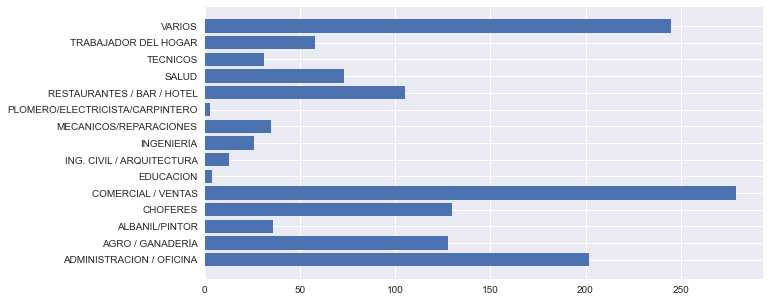

In [197]:
# Graficamos el resultado con barras horizontales no acumulativas
plt.figure(figsize=(10,5))

x = df_actlz.columns[1:-1]
y = []
for i in range(len(df_actlz['FECHA'])):
    y.append(list(df_actlz.iloc[i])[1:-1])
    if i == 0:
        cont = np.array(y[i])
    else:
        cont = cont + np.array(y[i])

plt.barh(x, cont)
#plt.legend(loc='lower left', bbox_to_anchor=(0.8, 0.1))
plt.show()

In [ ]:
# Exportamos el dataset a un csv actualizado
df_actlz.to_csv("C:/Users/TELMA/Desktop/trabajos/contrata2 clasificados el deber/2_11_confiltros.csv", sep=";", encoding="latin-1")